In [1]:
import pandas as pd
import numpy as np
import os
from PIL import Image, ImageDraw

In [2]:
data = pd.read_csv('10fold/pneumonia-test-0', sep=';')
data2 = pd.read_csv('10fold/pneumonia-train-0', sep=';')
data.append(data2, ignore_index=True)

,patientId,x,y,width,height,Target
0,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
1,008c19e8-a820-403a-930a-bc74a4053664,NaN,NaN,NaN,NaN,0
2,0174c4bb-28f5-41e3-a13f-a396badc18bd,155.0,182.0,273.0,501.0,1
3,0174c4bb-28f5-41e3-a13f-a396badc18bd,599.0,220.0,227.0,508.0,1
4,01b56434-4dd9-4994-bcc5-0b70a36e415a,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [3]:
data = data.loc[data['Target'] != 0]
data.reset_index(inplace=True, drop=True)
data.head()


,patientId,x,y,width,height,Target
0,0174c4bb-28f5-41e3-a13f-a396badc18bd,155.0,182.0,273.0,501.0,1
1,0174c4bb-28f5-41e3-a13f-a396badc18bd,599.0,220.0,227.0,508.0,1
2,01fa0f5e-00c3-41cb-b5c7-10600c8633ae,602.0,438.0,101.0,101.0,1
3,01fa0f5e-00c3-41cb-b5c7-10600c8633ae,364.0,419.0,96.0,121.0,1
4,040a0743-f663-4746-8224-f0e3bacc7ba5,294.0,228.0,87.0,144.0,1


In [4]:
data.describe()

,x,y,width,height,Target
count,900.000000,900.000000,900.000000,900.000000,900.0
mean,401.865556,379.456667,213.986667,316.087778,1.0
std,205.179806,149.569636,57.777024,149.867380,0.0
min,6.000000,26.000000,59.000000,46.000000,1.0
25%,216.750000,258.000000,173.750000,201.000000,1.0
50%,343.500000,386.000000,214.000000,285.000000,1.0
75%,598.000000,491.000000,253.000000,409.000000,1.0
max,808.000000,836.000000,413.000000,808.000000,1.0


[]

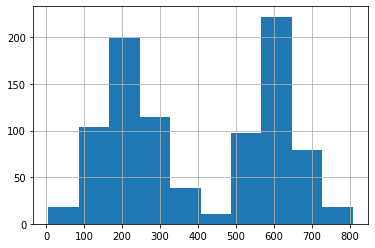

In [6]:
data['x'].hist().plot()


[]

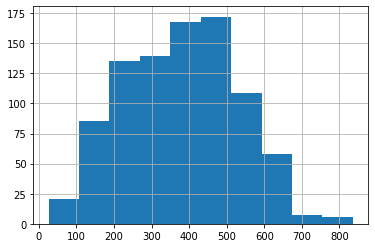

In [7]:
data['y'].hist().plot()


[]

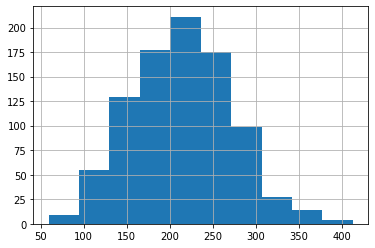

In [8]:
data['width'].hist().plot()



[]

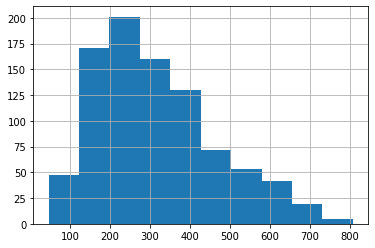

In [9]:
data['height'].hist().plot()



In [13]:
def draw_rectangle(image, x_min, y_min, width, height, color='yellow', size=1):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=size, outline=color)
    return image

def show_grid(images, images_per_line=3):
    #creates a new empty image, RGB mode, and size 400 by 400.
    width, height = images[0].size
    num_lines = int(np.ceil(images / images_per_line))
    grid_width = int(width * images_per_line)
    grid_height = int(height * num_lines)
    background = Image.new('RGB', (grid_width, grid_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    for i in range(num_lines):
        for j in range(images_per_line):
            idx = i * images_per_line + j
            image = images[0]
            x = i * width
            y = j * height
            #paste the image at location i,j:
            background.paste(image, (x,y))
    
    return background

patientId    0174c4bb-28f5-41e3-a13f-a396badc18bd
x                                             155
y                                             182
width                                         273
height                                        501
Target                                          1
Name: 0, dtype: object
patientId    0174c4bb-28f5-41e3-a13f-a396badc18bd
x                                             599
y                                             220
width                                         227
height                                        508
Target                                          1
Name: 1, dtype: object
patientId    01fa0f5e-00c3-41cb-b5c7-10600c8633ae
x                                             602
y                                             438
width                                         101
height                                        101
Target                                          1
Name: 2, dtype: object
patientId    01fa0f5e-00c3-41cb

In [ ]:
num_images = 10
data = data.iloc[:10]
images = []
for i in range(10):
    example = data.iloc[i]
    patientId = example['patientId']
    image = Image.open(os.path.join('images/train', patientId + '.jpg'))
    images.append(draw_rectangle(image=image,
                                 x_min=example['x'],
                                 y_min=example['y'],
                                 width=example['width'],
                                 height=example['height'],
                                 color='yellow',
                                 size=1))
show_grid(images, images_per_line=2)